

## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [0]:
# https://www.asozykin.ru/deep_learning/2019/02/18/Colab-Linux-Commands.html - немного информации о colab
# pip install -U - обновление пакета(ов)
# команды Linux должны начинаться с восклицательного знака (!)
# torchvision - Пакет состоит из популярных наборов данных, моделей архитектуры
#               и инструментов преобразования изображений для компьютерного зрения.
# torch - реализует основную структуру данных библиотеки — n-мерный тензор, а также базовые методы для работы с ним
# Для установки нескольких пакетов в командной строке просто передайте их как список с разделителями-пробелами
!pip install -U torch torchvision
#Находит пакет и показывает данные о нем
# !pip search Pillow

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.1.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.3.0)


In [0]:
# установка подходящей версии torch

# Конструкция from… import позволит указать напрямую, на какие определения нужно ссылаться
# os.path  реализует некоторые полезные функции для работы с путями.
# os.path.exists(path) - возвращает True, если path указывает на существующий путь или дескриптор открытого файла
from os.path import exists
# wheel - альтернативный способ распространения пакетов Python https://pypi.org/project/wheel/
# wheel.pep425tags - Создание и работа с тегами совместимости PEP 425. https://www.kite.com/python/docs/wheel.pep425tags
# get_abbr_impl - Возвращает сокращенное имя реализации.
# get_impl_ver - Возврат версии реализации.
# get_abi_tag = Возвращает тег ABI на основе SOABI (если доступно) или эмулировать SOABI (CPython 2, PyPy).
# PEP - руководство по написанию кода на Python
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# .format - подставляет в строку несколько данных https://pythonworld.ru/osnovy/formatirovanie-strok-metod-format.html
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# утилита ldconfig, создает необходимые связки и формирует кэш динамических библиотек установленных в вашем Линуксе.
# ldconfig -p какие-же библиотеки в данный момент находятся в кэше
# утилита grep, в основном используется для поиска строк, соответствующих строке в тексте или содержимому файлов
# есть ли у Вас библиотеки от пакета mysql = ldconfig -p | grep mysql
# | Вертикальная черта служит для перенаправления ввода "конвеера", таким образом, 
#   что вывод предыдущей команды (до черты) служит входными данными для следующей после неё команды.
# Утилиту sed называют потоковым текстовым редактором, получает входной поток 
#         (обычно файл) построчно, редактирует каждую строку согласно правилам 
#           http://aidalinux.ru/w/Sed  http://citforum.ru/operating_systems/articles/tut_6.shtml
# Опция -e --expression=набор_команд, один из способов выполнения нескольких команд - применение опции -e
#         в данном случае -е можно было не использовать, т.к. команда у нас одна
# Команда s заменяет ОБРАЗЕЦ на ЗАМЕНУ
# !echo hell | sed 's/./R/' #Rell один символ (первый) заменить на R
# !echo hell | sed 's/.*/R/' #R все символы заменить на R
# !echo wordmy | sed 's/.*rd/R/' # Rmy, заменить все до ".*rd" (rd включая) на R
# !echo he.ll. | sed 's/\./R/' #heRll. точку(первую найденную) заменить на R
# !echo .mihe.ll | sed 's/.*\./R/' #Rll все символы до последней точку заменить на R
# !echo  Thhhhell1-hell2 | sed 's/.*e/R/' #Rll2 все символы до последней е(включая) заменить на R
# !echo  Thhhhell1 he | sed 's/h*e/R/' #TRll1 he любое количество h сразу найденных между h и e (he,hhe,hhhe) до е(включая) заменить на R
# !echo hell | sed 's/[a-z]/R/' #Rell заменяет первый найденных символ из [..]  на R
# !echo hell8 hell7 | sed 's/[a-z]*/R/' #R8 hell7 заменяет все буквы в начале на R (8hell - не заменил бы)
# !echo he1ll | sed 's/[a-z][a-z][a-z]/R/' #he1ll ничего не заменит, т.к. нет 3х подряд разных букв
# !echo 8hell-hell8 | sed 's/[a-z]*-[a-z]*/R/' #8R8 ищет любые сиволы между "-" и заменяет их на R
# \(, \) - для обработки части ОБРАЗЦА, применяются для запоминания части регулярного выражения.
# !echo abc12 | sed 's/\([a-z]\)/R/' # Tbc12 ищет образец, т.е. любой символ и заменяет его на R
# !echo abc123 | sed 's/\([a-z]\)/\1 - /' #a - bc123  запомним первый образец и выведем его
# !echo abc123 | sed 's/\([a-z]*\)/\1 - /' #abc - 123 найти любую последовательность символов с начала текста (нашел abc)
# !echo 1abc123 a2 | sed 's/\([a-z]*\)/\1 - /' #- 1abc123 a2 ничего не найдет
# !echo abTbc 123 | sed 's/\([a-z]*\)\T\([a-z]*\)/R \2\1/' #R bcab 123 найти любые символы между T и заменить на R, сохраняет в 2 образцах
# !echo abTbc123.ab1.ab2 | sed 's/.*\.\([a-z]*\)/cu \1=/' #cu ab=2 заменить все до последней точки(включая) на "cu ", после точки найти любые символы и вывести образец \1 с сивволом =
# !echo ab.cdRef.dg | sed 's/.*\.\([a-z]*\)\R\([a-z]*\)/cu \1 \2 /' # cu cd ef .dg - найти последовательность где после . будет символыRсимволы, и если найдет, все до . заменить на "cu " и вывести 2 образца.
# !echo abT12.ab1.abTcd | sed 's/.*\.\([a-z]*\)\.\([a-z]*\)/cu \1\2/' #abT12.ab1.abTcd пример
# !echo abT12.ab1RabTcd | sed 's/.*\.\([a-z]*\)\.\([a-z]*\)/cu \1\2/' #abT12.ab1RabTcd - не нашел выведет всю строчку
# !echo 'rt.so.10.0' | sed 's/.*\.\([0-9]*\)\.\([0-9]*\)/cu \1-\2=/' #cu 10-0= пример
# 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/' #найти точку, так что бы после неё были символы.сиволы $ доконца текста, если найдется заменить на cu и вывести 1 образец 2 образец
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
# A = Y if X else Z выполнится выражение Y, если X истинно, в противном случае выполнится Z
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

# {} подстановка параметра
# -q = --quiet значит тихая установка
# .whl содержат python-пакет и необходимые метаданные https://habr.com/ru/post/210450/
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.1.0-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# we will verify that GPU is enabled for this notebook
# мы проверим, что GPU включен для этого ноутбука
# following should print: CUDA is available!  Training on GPU ...
# следующее должно напечатать: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# если он печатает иначе, то вам нужно включить GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

# Возвращает bool, указывающий, доступен ли CUDA в данный момент.
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available (НЕ доступен).  Training on CPU ...')
else:
    print('CUDA is available (доступен)!  Training on GPU ...')

CUDA is available (доступен)!  Training on GPU ...


In [0]:
# Pillow - библиотека предоставляет поддержку при открытии,управлении и сохранении многих форматов изображения.
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
# pip uninstall документация https://pip.pypa.io/en/stable/reference/pip_uninstall
# Параметр "-y" не запрашивайте подтверждение удаления удаления.
!pip uninstall -y Pillow
# == Установка определенной версии
!pip install Pillow==5.3.0
import PIL
# PIL документация https://pillow.readthedocs.io/en/stable/deprecations.html
# PIL.PILLOW_VERSION является устаревшим и будет удален в следующем выпуске. Вместо того, чтобы использовать __version__ 
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Uninstalling Pillow-4.3.0:
  Successfully uninstalled Pillow-4.3.0
     |████████████████████████████████| 2.0MB 3.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


4.3.0


In [0]:
# справка по встроенной функции help(len)
# import google.colab
# help(google.colab) # справка по подключаемому модулю
# help(google.colab.drive) # справка по объекту из подключаемого модуля

# google.colab - специфическая интеграция с Google Диском.
from google.colab import drive
# mount(mountpoint, force_remount=False, timeout_ms=15000) Смонтируйте Google Диск по указанному пути к точке монтирования.
drive.mount('/content/gdrive/')

# pwd # посмотреть текущую папку Linux
# drive.mount('/gdrive')
# cd /gdrive  # делает указанную папку текущей ! ставить не нужно

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
pwd

'/content'

In [0]:
# !unzip # Утилита для распаковки ZIP https://losst.ru/kak-raspakovat-zip-v-linux
# -q - выводить минимум информации
# !unzip архив -d папка в которую будет распаковываться архив
# !unzip  /content/gdrive/My\ Drive/text.zip -d tx1 # пример
# '\ ' косая черта пробел - это по сути символ пробела
!unzip -q /content/gdrive/My\ Drive/simpsons/data/dataset.zip -d train
!unzip -q /content/gdrive/My\ Drive/simpsons/data/testset.zip -d test

In [0]:
# !ls без пути выдает содержимое текущего каталога  https://losst.ru/komanda-ls-linux
!ls
# !ls train содержание каталога train
!ls train

gdrive	sample_data  test  train
__MACOSX  simpsons_dataset


In [0]:
# утилита nvidia-smi (NVIDIA System Management Interface), входит в комплект драйверов производимых компанией NVIDIA 
# https://andreyv.ru/nvidia-smi-poleznye-komandy.html
!nvidia-smi
# PyTorch — современная библиотека глубокого обучения, развивающаяся под крылом Facebook
# https://pytorch.org/docs/stable/index.html
import torch
# Возвращает bool, указывающий, доступен ли CUDA в данный момент.
torch.cuda.is_available()

Fri Jun 28 08:30:15 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    16W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [0]:
# PANDAS пакет делает Python мощным инструментом для анализа данных.
# https://habr.com/ru/post/196980/  Введение в анализ данных с помощью Pandas
import pandas as pd
# Series – это проиндексированный одномерный массив значений
# DataFrame — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series.
# read_csv - читает файл sep - разделитель
df1 = pd.read_csv("gdrive/My Drive/file1.csv",sep=";")
df2 = pd.read_csv("gdrive/My Drive/file3.csv",sep=";")


country = ['Украина','РФ','Беларусь','РФ','РФ']
# insert добавляет колонку в данные, где 1 индекс колонки, 2 название колонки, 3 данные колонки
df2.insert(1,'country',country)
# выбирает данные по условию, тип полученных данных DataFrame такой же как и самих данных
dt = df2[df2.country == "Украина"]
# добавляем DataFrame новую строку
df2 = df2.append(dt)
# соединяем таблицы, как в запросе, левое соединение по полю shop
res = df2.merge(df1, 'left', on='shop')
# сводная таблица(отчет), ['qty'] - что сводим,['country'] - какие колонки aggfunc -функция агрегации, 
# fill_value - на что заменяем пустое значение
tab = res.pivot_table(['qty'],['country'], aggfunc='sum', fill_value = 0)
# получить колонку по имени
ser = df2["country"]
# показывает значения колонки
df2["country"].value_counts().plot.barh();

In [0]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder Кодировать метки со значением от 0 до n_classes-1
label_encoder = LabelEncoder()
list1 = ["а", "б", "б", "в"]
list2 = ["а", "б", "б", "в", "в", "в", "в"]
# fit подготавливает данные для кодирования, ничего не возвращает
# label_encoder.fit(list)
# classes_ атрибут класса, содержит метки для каждого класса (доступен после кодирования)
# array(['а', 'б', 'в'], dtype='<U1'), т.е. а=0,б=1,в=2
# label_encoder.classes_ 
# выводит словарь {0: 'а', 1: 'б', 2: 'в'}
# enumerate Возвращает генератор, отдающий пары счётчик-элемент для элементов указанной последовательности.
# print(dict(enumerate(label_encoder.classes_)))
# преобразовывает полученный массив в массив с метками, возвращает новый массив
# array1 = label_encoder.transform(list) 
# print(array1)
# одновремено трансформирует метки и возвращает новый массив, можно сразу подавать 2й массив для трансформации
array1 = label_encoder.fit_transform(list1)
array2 = label_encoder.transform(list2)
# преобразование меток обратно в исходный массив
array3 = label_encoder.inverse_transform(array2)

In [0]:
# про циклы https://python-scripts.com/loops-for-while
my_list = [1, 2, 3, 4, 5]
for i in my_list:
    if i == 30:
        print("Item found!")
        break
    print(i)
else:
    print("Item not found!")

In [0]:
# Модуль pickle реализует мощный алгоритм сериализации и десериализации объектов 
# https://pythonworld.ru/moduli/modul-pickle.html
import pickle
import numpy as np
# scikit-image - пакет Python для обработки изображений, который работает с массивами numpy
# https://habr.com/ru/post/441006/ https://scikit-image.org/docs/stable/
# Утилиты для чтения и записи изображений в различных форматах.
from skimage import io
# tqdm - быстрый, расширяемый progress bar для Python https://tqdm.github.io https://pythondigest.ru/view/8867/
# tqdm_notebook - Экспериментальный виджет IPython / Jupyter Notebook с помощью tqdm!
from tqdm import tqdm, tqdm_notebook
# Pillow - библиотека предоставляет поддержку при открытии,управлении и сохранении многих форматов изображения.
from PIL import Image
# pathlib - объектно-ориентированный подход к файловым путям 
# https://docs.python.org/3/library/pathlib.html https://habr.com/ru/post/453862/
from pathlib import Path

# torchvision - Пакет состоит из популярных наборов данных, моделей архитектуры
#               и инструментов преобразования изображений для компьютерного зрения.
# https://pytorch.org/docs/stable/torchvision/index.html?highlight=torchvision#module-torchvision
# https://alexanderkurakin.blogspot.com/2019/01/pytorch-data-loading-preprocessing.html
from torchvision import transforms

# multiprocessing -пакет позволяет работать с несколькими процессами 
# http://python-3.ru/page/multiprocessing https://docs.python.org/3.6/library/multiprocessing.html#module-multiprocessing
# класс Pool, используется для параллельного выполнения функции между несколькими входами.
from multiprocessing.pool import ThreadPool
# Scikit-learn библиотека машинного обучения https://scikit-learn.org
# sklearn.preprocessing - модуль для предварительной обработки включает масштабирование, центрирование, методы нормализации и т.д.
# LabelEncoder Кодировать метки со значением от 0 до n_classes-1 ,каждой категории сопоставляет некоторое целое число
# https://habr.com/ru/company/ods/blog/326418/ http://blog.datalytica.ru/2018/04/blog-post.html
from sklearn.preprocessing import LabelEncoder

# DataLoader Загрузчик данных. Объединяет набор данных и сэмплер и предоставляет итераторы одного или нескольких процессов над набором данных.
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# matplotlib - библиотека, которая позволяет создавать графики. https://pyprog.pro/mpl/mpl_short_guide.html
# Способы задания цвета в Matplotlib https://jenyay.net/Matplotlib/Colors
# matplotlib.colors Модуль для преобразования чисел или цветовых аргументов в RGB или RGBA
#              https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html#module-matplotlib.colors
#              https://matplotlib.org/3.1.0/api/colors_api.html
# matplotlib.pyplot в основном предназначен для интерактивных графиков и простых случаев генерация программных графиков:
from matplotlib import colors, pyplot as plt
# %matplotlib inline указывает, что график необходимо построить все в той же ячейки
# , но теперь он выводится как обычная картинка.
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
# warnings - Базовый класс для исключений-предупреждений https://docs.python.org/3/library/warnings.html#warnings.filterwarnings
import warnings
# filterwarnings Фильтр предупреждения определяет, будут ли предупреждения игнорироваться
#             https://docs.python.org/3/library/warnings.html#warning-filter
# action='ignore' никогда не печатайте соответствующие предупреждения
# DeprecationWarning - Базовый класс для предупреждений об устаревших функциях, 
# когда эти предупреждения предназначены для других разработчиков Python.
#             https://docs.python.org/3/library/exceptions.html#Warning
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [0]:
# РАЗНОЕ ПРО CUDA https://pytorch.org/docs/stable/cuda.html#torch.cuda.current_device
# torch.cuda пакет добавляет поддержку типов тензоров CUDA
# torch.cuda.is_available() #поддерживается ли CUDA
# torch.cuda.current_blas_handle() # возвращает указатель на текущую устройств обработки
# torch.cuda.current_device() # Возвращает индекс текущего выбранного устройства.
# torch.cuda.device_count() # Возвращает количество доступных графических процессоров.
# torch.cuda.get_device_name() # Возвращает имя устройства
# uniform_(from=0, to=1) Создает тензор с числами, выбранными из непрерывного равномерного распределения
# x = torch.FloatTensor(5, 5, 5).uniform_()

# разные режимы датасета 
# train - данные для тренировки
# val (валидация) - данные для подбора гиперпараметров
# test - данные для окончательного тестиования
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
# torch.device('cuda') устройство на котором будет производится расчет тензоров ('cpu' or 'cuda')
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} \\$,      константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [0]:
# Про форматирование строк https://shultais.education/blog/python-f-strings
# a1 = "hello"; a2="world"; a3=2.12345; p1 = [1,2,3]
# print("%s %s" %(a1,a2))
# print("%(name1)s %(name2)s" %{"name1":a1,"name2":a2})
# print("{} {}".format(a1,a2))
# print("{name1} {name2}".format(name1=a1,name2=a2))
# print(f"{a1} {a2} {a3:.3f} {p1[0]}")

# x = "Mike"
# print(dir(x)) # посмотреть методы и переменные объекта
# немного про классы https://python-scripts.com/python-class и https://devpractice.ru/python-lesson-14-classes-and-objects/
# немного о Dataset https://alexanderkurakin.blogspot.com/2019/01/pytorch-data-loading-preprocessing.html
# torch.utils.data.Dataset - абстрактный класс, представляющий набор данных. 
# Ваш пользовательский набор данных должен наследовать Dataset и переопределять следующие методы:
# __len__, чтобы len(dataset) возвращал размер набора данных.
# __getitem__ для поддержки индексации, так что dataset[i] может использоваться для получения i-го экземпляра
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        # super запускает родительский конструктор http://fkn.ktu10.com/?q=node/4087
        # class A(object): # пример
        #   def __init__(self):
        #     print('конструктор класса A')
        # class B(A):
        #   def __init__(self):
        #     super().__init__()
        #     print('конструктор класса B')
        # cl1 = B()
        super().__init__()
        # список файлов для загрузки (зачем сортируем не понятно!)
        self.files = sorted(files)
        # режим работы
        self.mode = mode
        
        # если имя модели не в списке моделей, то вызвать исключение
        if self.mode not in DATA_MODES:
            # Работа с исключениями https://devpractice.ru/python-lesson-11-work-with-exceptions/
            # raise - вызывает исключение
            strException = f"<{self.mode}> is not correct; correct modes: {DATA_MODES}"
            try:
              raise Exception(strException)
            except Exception as e:
              print("Exception! " + str(e))            

        # размер переданного списка файлов
        self.len_ = len(self.files)
        # создаем экземпляр класса для преобразования данных в метки
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            # self.files - у нас итерируемый элемент, по этому мы его можем обойти
            # создаем list из названий родителей картинок (т.е. из папок)
            self.labels = [path.parent.name for path in self.files]
            # на базе названий родителей через fit готовим индексы для перекодирования
            self.label_encoder.fit(self.labels)
            # работа с файлами https://pythonworld.ru/tipy-dannyx-v-python/fajly-rabota-s-fajlami.html
            # With ... as https://pythonworld.ru/osnovy/with-as-menedzhery-konteksta.html
            # with ... as гарантии того, что критические функции выполнятся в любом случае.
            # w - открытие на запись b - открытие в двоичном режиме (режимы можно совмещать)            
            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  # Модуль pickle реализует мощный алгоритм сериализации и десериализации объектов 
                  # pickle.dump   записывает сериализованный объект в файл.
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    # переопределяемая функция, возвращает длинну объекта, т.е. количество картинок
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
    
    # переопределяемая функция, служит для возвращения объекта по индексу, 
    # т.е. передается index и нужно вернуть, как-то элемент
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [0]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [0]:
# https://losst.ru/put-k-fajlu-v-linux про пути в Лунукс
# /content/train/ это полный путь от корня
# content/train/ а тут путь считается от текущей папки (pwd - проверить текущую папку)
# по сути это получение/инициация экземпляра класса class 'pathlib.PosixPath', а у класса есть разные функции
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('test/testset')
# Шаблон "**" означает "этот каталог и все подкаталоги - пример glob('**/*.jpg')
# rglob('*.jpg') по сути то же самое, что и "**"
# оба метода возвразают генератор
# TRAIN_DIR.glob('**/*.jpg') == TRAIN_DIR.rglob('*.jpg')
# sorted(list - превращаем в лист и сортируем
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
print(len(train_val_files))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))
print(len(test_files))


20933
991


In [0]:
# train_test_split - функция служит для разбиение данных(массивов или матриц)
# на 2 случайные последовательности, т.е. возвращает 2 списка данных
from sklearn.model_selection import train_test_split

# немного про генераторы https://younglinux.info/python/feature/generators
# generator = [i for i in range(1,15)]
# list = [i for i in gn] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# path.parent.name - родитель каталога и его имя, получим список из имен родителей
train_val_labels = [path.parent.name for path in train_val_files]
# train_test_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
# train_test_split(*arrays, **options)
# *arrays = списки, массивы numpy, разреженные матрицы scipy или фреймы данных pandas.
# \ - позволяет сделать разрыв строки
# test_size размер тествой выборки, может быть от 0.0 до 1.0 или задаваться целым число, данных которые нужно вернуть
# train_size размер тренировочной выборки, может быть от 0.0 до 1.0 или задаваться целым число, данных которые нужно вернуть
# list1 = [i for i in range(10)] # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
# train, test = train_test_split(list1,test_size=2,train_size=4)
# train [7, 4, 0, 8] test [5, 6]
# train, test = train_test_split(list1,test_size=.2,train_size=.8)
# train[8, 5, 4, 3, 2, 6, 7, 1] test[0, 9]
# shuffle перемешивать данные перед разделением True
# stratify : array-like - массив для стратификации, т.е. для каждого элемента выборки должен быть класс
# в массиве стратификации, т.е. количество элементов массива стратификации должно равняться разделяемому массиву 
# Стратификация заключается в том, чтобы заранее поделить выборку на части (страты), 
# и при разбиении на обучение длины m и контроль длины k гарантировать, что каждая страта 
# будет поделена между обучением и контролем в той же пропорции m:k.
# train_val_files разбиваемый массив
# test_size=0.25 размер тестового возвращаемого массива
# stratify=train_val_labels лейблы стратификации
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

print(len(train_val_files))
print(len(train_files))
print(len(val_files))

20933
15699
5234


In [0]:
val_dataset = SimpsonsDataset(val_files, mode='val')

In [0]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), sharey=True, sharex=True)

for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [0]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [0]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [0]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [0]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [0]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [0]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

Запустим обучение сети.

In [0]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [0]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=2, batch_size=64)

Построим кривые обучения

In [0]:
loss, acc, val_loss, val_acc = zip(*history)

In [0]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [0]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [0]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [0]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [0]:
# pickle.load загружает объект из потока байт, т.е получаем сериализованные данные
# rb - чтение байтовое
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [0]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

In [0]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [0]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(simple_cnn, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [0]:
! ls 

In [0]:
import pandas as pd
my_submit = pd.read_csv("gdrive/My Drive/simpsons/data/labels.csv")
# my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
my_submit.head()

In [0]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

In [0]:
my_submit.to_csv('gdrive/My Drive/simpsons/simple_cnn_baseline.csv', index=False)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеемся,  у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)


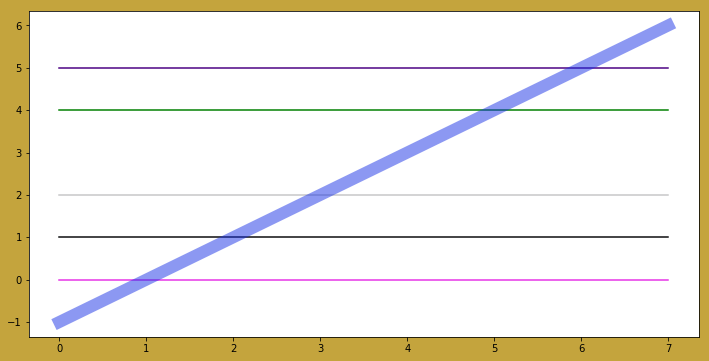

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 1. По сути можно просто рисовать, каждая следующая точка, соединяется с предыдущей
# list_x1 = (0,0,1,1,0,1,1,0,0.5,0.5)
# list_y1 = (0,1,1,0,0,1,0,1,1.0,0.5)
# plt.plot(list_x1,list_y1)
# list_x2 = (0.5,0.5,1.0,0.5)
# list_y2 = (0.0,0.5,0.5,0.0)
# plt.plot(list_x2,list_y2)
# plt.show()
# 2. По такому же принципу выводятся точки, можно вывести в одном графике разные точки
# plt.scatter([0,1,2,3,4,5],[5,5,5,5,5,5])
# plt.scatter([0,1,2,3,4,5],[4,4,3,3,4,4])
# plt.scatter([0,1,2,3,4,5],[2,2,2,2,2,2])
# plt.show()
# 3. Построение гистограммы width-ширина колонки, за счет указания разного Х идет наложение 
# plt.bar([0.9,1.9,2.9],[15,25,15],width=0.3)
# plt.bar([1.1,2.1,3.2],[10,20,5],width=0.3)
# # горизонтальный бар
# # plt.barh([1,2,3],[10,20,5])
# plt.show()
# Круговые диаграммы pie(пирог)
# plt.pie([100,10,20])
# plt.show()
# 4. создаем экземпляр класса фигара и указываем цвет
# fig = plt.figure(figsize=[12,5])
# fig.set_facecolor("green")
# # 1 строка, 2 колонки, номер позиции в данном положении, т.е. 1 из 4 
# ax1 = fig.add_subplot(1,2,1)
# ax1.set(facecolor = "red")
# ax1.set_xlim(-5,5)
# ax1.set_ylim(-10,10)
# ax1.set_title("Заголовок таблицы")
# ax1.set_xlabel("Ось Х")
# ax1.set_ylabel("Ось У")
# ax2 = fig.add_subplot(1,2,2)
# ax2.set(facecolor = "blue")
# ax2.title.set_color("white")
# ax2.set_title("Второй график", size=25)
# plt.show()
# 5. точки и линии
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot([1,2,8,9],[1,2,8,4],linewidth=2)
# ax.scatter([4,1,2,8,9],[5,1,2,8,4], color="red", marker ="*")
# plt.show()
# 6.1 варианты разбивки области
# первое - количество строк;второе - количество столбцовтретье - индекс ячейки.
# ax1 = fig.add_subplot(2,2,1)
# ax2 = fig.add_subplot(2,2,2)
# ax3 = fig.add_subplot(2,2,4)
# # xticks=[1,2],yti(cks=[] - устанавливают координаты по Х и У
# ax1.set(title="ax1",xticks=[1,2],yticks=[])
# ax2.set(title="ax2",xticks=[],yticks=[])
# ax3.set(title="ax 3")
# plt.show()
# 6.2 картинка в картинке
# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
# ax2 = fig.add_subplot(3,3,3)
# ax1.set(xticks=[],yticks=[])
# ax2.set(xticks=[],yticks=[])
# plt.show()
# 6.3 сетка из картинок
# fig, axes = plt.subplots(2,2)
# # если без данных, то создается один элемент axes сам элемент
# # fig, axes = plt.subplots()
# # flat - поэлементно перебрать весь массив, как если бы он был 1 элементым
# for _,ax in enumerate(axes.flat):
#   ax.set(title="ax"+str(_), xticks=[],yticks=[])
# plt.show()

# 7. plot - график линии
x = np.zeros(8)
fig, ax = plt.subplots()
# type(ax)
ax.plot(x, color = (0.9, 0.2, 0.9)) # RGB от 0 до 1
ax.plot(x + 1, color = '#0a0b0c') # hex RGB:
ax.plot(x + 2, color = '#0a0b0c3a') # hex RGBA:
ax.plot(x + 4, color = 'g') # ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.plot(x + 5, color = 'indigo') # название цвета из X11/CSS4:
ax.plot(np.arange(-1, 7), color = (0.1, 0.2, 0.9, 0.5), linewidth = 12) # RGBA:
# ширина и высота фигуры в дюймах
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor("#c4a43d")

# fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), sharey=True, sharex=True)

# for fig_x in ax.flatten():
#     random_characters = int(np.random.uniform(0,1000))
#     im_val, label = val_dataset[random_characters]
#     img_label = " ".join(map(lambda x: x.capitalize(),\
#                 val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
#     imshow(im_val.data.cpu(), \
#           title=img_label,plt_ax=fig_x)
    
# def imshow(inp, title=None, plt_ax=plt, default=False):
#     """Imshow для тензоров"""
#     inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     inp = std * inp + mean
#     inp = np.clip(inp, 0, 1)
#     plt_ax.imshow(inp)
#     if title is not None:
#         plt_ax.set_title(title)
#     plt_ax.grid(False)

In [0]:
# import torch
# from torch.nn import Linear

# # пример получения весов
# neuron = torch.nn.Sequential(
#     Linear(1, 2),
#     Linear(2, 1),    
# )

# for p in neuron.parameters():        
#   print(type(p))
#   print(p.data)
#   print(p.requires_grad)